In [220]:
import pandas as pd
import numpy as np
df = pd.read_csv('train_aWnotuB.csv')
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [221]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [222]:
df = df.drop_duplicates()
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [223]:
print(df.columns)

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [224]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time

df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

In [225]:
df['Date'] = pd.to_datetime(df['Date'])
df['DateOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.sample(5)

,DateTime,Junction,Vehicles,ID,Date,Time,DateOfWeek,Month,Year
7991,2016-09-28 23:00:00,1,63,20160928231,2016-09-28,23:00:00,2,9,2016
17756,2016-03-11 20:00:00,2,15,20160311202,2016-03-11,20:00:00,4,3,2016
17684,2016-03-08 20:00:00,2,14,20160308202,2016-03-08,20:00:00,1,3,2016
8578,2016-10-23 10:00:00,1,37,20161023101,2016-10-23,10:00:00,6,10,2016
44754,2017-02-10 18:00:00,4,8,20170210184,2017-02-10,18:00:00,4,2,2017


In [226]:
df = df.drop(['ID'], axis = 1)
df.sample(5)

,DateTime,Junction,Vehicles,Date,Time,DateOfWeek,Month,Year
46194,2017-04-11 18:00:00,4,8,2017-04-11,18:00:00,1,4,2017
19983,2016-06-12 15:00:00,2,8,2016-06-12,15:00:00,6,6,2016
15910,2015-12-25 22:00:00,2,4,2015-12-25,22:00:00,4,12,2015
30136,2015-12-10 16:00:00,3,5,2015-12-10,16:00:00,3,12,2015
2321,2016-02-05 17:00:00,1,28,2016-02-05,17:00:00,4,2,2016


In [227]:
import holidays
df['Date'] = pd.to_datetime(df['Date'])
indian_holidays = holidays.India(years=df['Date'].dt.year.unique())

def is_holiday_in_india(date):
    return date in indian_holidays

# Apply the custom function to the 'Date' column
df['IsHoliday'] = df['Date'].apply(lambda x: is_holiday_in_india(x))

In [228]:
df.sample(5)

,DateTime,Junction,Vehicles,Date,Time,DateOfWeek,Month,Year,IsHoliday
1702,2016-01-10 22:00:00,1,25,2016-01-10,22:00:00,6,1,2016,False
14929,2015-11-15 01:00:00,2,5,2015-11-15,01:00:00,6,11,2015,False
6308,2016-07-20 20:00:00,1,58,2016-07-20,20:00:00,2,7,2016,False
17345,2016-02-23 17:00:00,2,14,2016-02-23,17:00:00,1,2,2016,False
26829,2017-03-24 21:00:00,2,28,2017-03-24,21:00:00,4,3,2017,False


In [229]:
df['IsHoliday'].unique()

array([False,  True])

Text(0.5, 1.0, 'Distribution of Vehicles by Holiday')

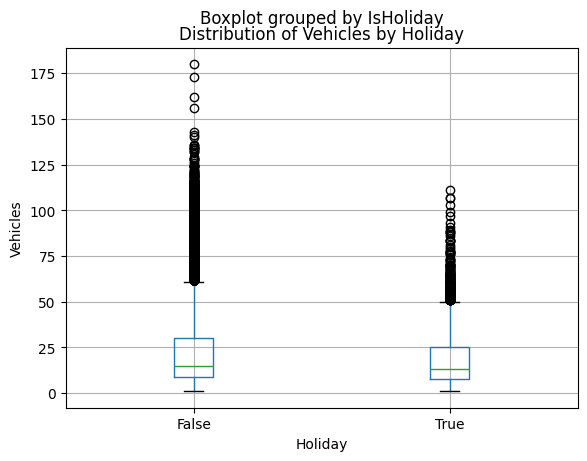

In [230]:
import matplotlib.pyplot as plt
df.boxplot(column=['Vehicles'], by='IsHoliday')
plt.xlabel('Holiday')
plt.ylabel('Vehicles')
plt.title('Distribution of Vehicles by Holiday')

Text(0.5, 1.0, 'Average Vehicles by Junction')

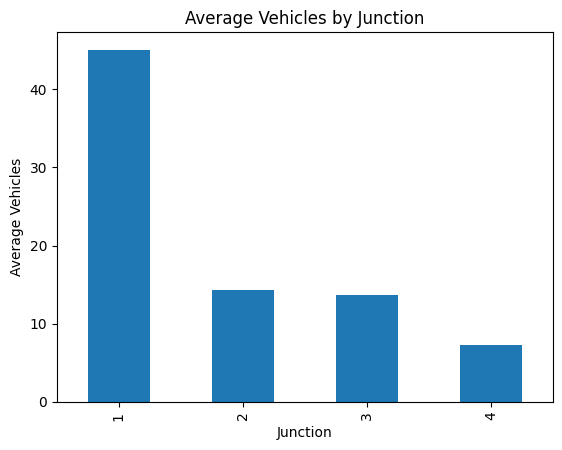

In [231]:
df.groupby('Junction')['Vehicles'].mean().plot(kind='bar')
plt.xlabel('Junction')
plt.ylabel('Average Vehicles')
plt.title('Average Vehicles by Junction')

In [232]:
from scipy.stats import ttest_ind
junction_1 = df[df['Junction'] == 1]['Vehicles']
junction_2 = df[df['Junction'] == 2]['Vehicles']

t_stat, p_value = ttest_ind(junction_1, junction_2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 153.93470815373487, p-value: 0.0


### LAG FEATURES

In [233]:
df['PreviousDay'] = df['Vehicles'].shift(24)
df['PreviousHour'] = df['Vehicles'].shift(1)
df.head()

,DateTime,Junction,Vehicles,Date,Time,DateOfWeek,Month,Year,IsHoliday,PreviousDay,PreviousHour
0,2015-11-01 00:00:00,1,15,2015-11-01,00:00:00,6,11,2015,False,NaN,NaN
1,2015-11-01 01:00:00,1,13,2015-11-01,01:00:00,6,11,2015,False,NaN,15.0
2,2015-11-01 02:00:00,1,10,2015-11-01,02:00:00,6,11,2015,False,NaN,13.0
3,2015-11-01 03:00:00,1,7,2015-11-01,03:00:00,6,11,2015,False,NaN,10.0
4,2015-11-01 04:00:00,1,9,2015-11-01,04:00:00,6,11,2015,False,NaN,7.0


In [234]:
df['PreviousDay'].fillna(0,inplace = True)
df['PreviousHour'].fillna(0,inplace = True)
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7764\2436561906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PreviousDay'].fillna(0,inplace = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7764\2436561906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

DateTime        0
Junction        0
Vehicles        0
Date            0
Time            0
DateOfWeek      0
Month           0
Year            0
IsHoliday       0
PreviousDay     0
PreviousHour    0
dtype: int64

In [235]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2)
len(train),len(test)

(38496, 9624)

In [236]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [237]:
df

,DateTime,Junction,Vehicles,Date,Time,DateOfWeek,Month,Year,IsHoliday,PreviousDay,PreviousHour
0,2015-11-01 00:00:00,1,15,2015-11-01,00:00:00,6,11,2015,False,0.0,0.0
1,2015-11-01 01:00:00,1,13,2015-11-01,01:00:00,6,11,2015,False,0.0,15.0
2,2015-11-01 02:00:00,1,10,2015-11-01,02:00:00,6,11,2015,False,0.0,13.0
3,2015-11-01 03:00:00,1,7,2015-11-01,03:00:00,6,11,2015,False,0.0,10.0
4,2015-11-01 04:00:00,1,9,2015-11-01,04:00:00,6,11,2015,False,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,2017-06-30,19:00:00,4,6,2017,False,9.0,17.0
48116,2017-06-30 20:00:00,4,30,2017-06-30,20:00:00,4,6,2017,False,13.0,11.0
48117,2017-06-30 21:00:00,4,16,2017-06-30,21:00:00,4,6,2017,False,12.0,30.0
48118,2017-06-30 22:00:00,4,22,2017-06-30,22:00:00,4,6,2017,False,15.0,16.0


In [238]:
from sklearn.preprocessing import MinMaxScaler
df['Vehicles'] = df['Vehicles'].astype(float)
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])
df

,DateTime,Junction,Vehicles,Date,Time,DateOfWeek,Month,Year,IsHoliday,PreviousDay,PreviousHour
0,2015-11-01 00:00:00,1,0.078212,2015-11-01,00:00:00,6,11,2015,False,0.0,0.0
1,2015-11-01 01:00:00,1,0.067039,2015-11-01,01:00:00,6,11,2015,False,0.0,15.0
2,2015-11-01 02:00:00,1,0.050279,2015-11-01,02:00:00,6,11,2015,False,0.0,13.0
3,2015-11-01 03:00:00,1,0.033520,2015-11-01,03:00:00,6,11,2015,False,0.0,10.0
4,2015-11-01 04:00:00,1,0.044693,2015-11-01,04:00:00,6,11,2015,False,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,0.055866,2017-06-30,19:00:00,4,6,2017,False,9.0,17.0
48116,2017-06-30 20:00:00,4,0.162011,2017-06-30,20:00:00,4,6,2017,False,13.0,11.0
48117,2017-06-30 21:00:00,4,0.083799,2017-06-30,21:00:00,4,6,2017,False,12.0,30.0
48118,2017-06-30 22:00:00,4,0.117318,2017-06-30,22:00:00,4,6,2017,False,15.0,16.0


In [239]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['DateTime'].dt.hour
#df.drop(columns=['Date'], inplace=True)
df.head()

,DateTime,Junction,Vehicles,Date,Time,DateOfWeek,Month,Year,IsHoliday,PreviousDay,PreviousHour,Day,Hour
0,2015-11-01 00:00:00,1,0.078212,2015-11-01,00:00:00,6,11,2015,False,0.0,0.0,1,0
1,2015-11-01 01:00:00,1,0.067039,2015-11-01,01:00:00,6,11,2015,False,0.0,15.0,1,1
2,2015-11-01 02:00:00,1,0.050279,2015-11-01,02:00:00,6,11,2015,False,0.0,13.0,1,2
3,2015-11-01 03:00:00,1,0.033520,2015-11-01,03:00:00,6,11,2015,False,0.0,10.0,1,3
4,2015-11-01 04:00:00,1,0.044693,2015-11-01,04:00:00,6,11,2015,False,0.0,7.0,1,4


In [240]:
df = df.drop('DateTime', axis=1)
df = df.drop('Date',axis=1)
df

,Junction,Vehicles,Time,DateOfWeek,Month,Year,IsHoliday,PreviousDay,PreviousHour,Day,Hour
0,1,0.078212,00:00:00,6,11,2015,False,0.0,0.0,1,0
1,1,0.067039,01:00:00,6,11,2015,False,0.0,15.0,1,1
2,1,0.050279,02:00:00,6,11,2015,False,0.0,13.0,1,2
3,1,0.033520,03:00:00,6,11,2015,False,0.0,10.0,1,3
4,1,0.044693,04:00:00,6,11,2015,False,0.0,7.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
48115,4,0.055866,19:00:00,4,6,2017,False,9.0,17.0,30,19
48116,4,0.162011,20:00:00,4,6,2017,False,13.0,11.0,30,20
48117,4,0.083799,21:00:00,4,6,2017,False,12.0,30.0,30,21
48118,4,0.117318,22:00:00,4,6,2017,False,15.0,16.0,30,22


In [241]:
df.dtypes

Junction          int64
Vehicles        float64
Time             object
DateOfWeek        int32
Month             int32
Year              int32
IsHoliday          bool
PreviousDay     float64
PreviousHour    float64
Day               int32
Hour              int32
dtype: object

### LSTM

In [242]:
sequence_length = 24
X_columns = ['Junction', 'Vehicles', 'DateOfWeek', 'Month', 'Year', 
             'PreviousDay', 'PreviousHour']
y_column = 'Vehicles'
X = []
y = []
data_array = df.values

data_array = df[X_columns + [y_column]].values

for i in range(len(data_array) - sequence_length):
    X.append(data_array[i:i + sequence_length, :-1])  # Exclude last column
    y.append(data_array[i + sequence_length, -1])  # Last column is target 'Vehicles'

X = np.array(X)
y = np.array(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train, epochs=30, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/30


C:\Users\Admin\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


962/962 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 2/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 3/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 5/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 6/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 10/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 11/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0013 - val_loss: 0.0013


In [244]:
loss = model.evaluate(X_test,y_test)
print(f"Test Loss: {loss}")
train_loss = model.evaluate(X_train,y_train)
print(f"Train Loss: {train_loss}")

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011
Test Loss: 0.0010404683416709304
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0011
Train Loss: 0.0011201419401913881


In [245]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_pred_original = scaler.inverse_transform(y_pred)

y_test_original = scaler.inverse_transform(y_test)

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


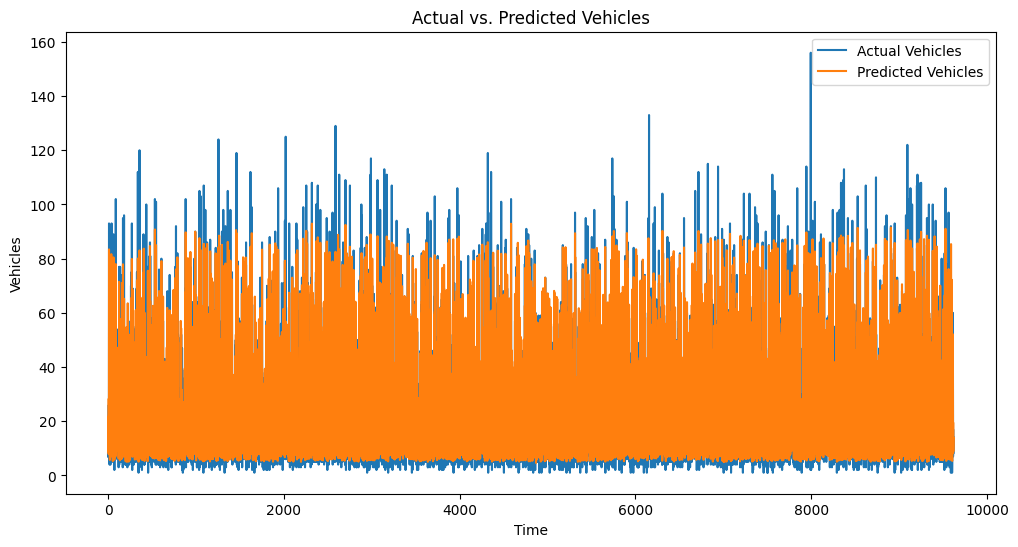

In [246]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Vehicles')
plt.plot(y_pred_original, label='Predicted Vehicles')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.title('Actual vs. Predicted Vehicles')
plt.legend()

In [247]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.5913152129635244
Mean Squared Error (MSE): 33.33763440674588
Root Mean Squared Error (RMSE): 5.773875163765309


In [248]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9202138408775705

In [249]:
df['DateTime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df.head()

,Junction,Vehicles,Time,DateOfWeek,Month,Year,IsHoliday,PreviousDay,PreviousHour,Day,Hour,DateTime
0,1,0.078212,00:00:00,6,11,2015,False,0.0,0.0,1,0,2015-11-01 00:00:00
1,1,0.067039,01:00:00,6,11,2015,False,0.0,15.0,1,1,2015-11-01 01:00:00
2,1,0.050279,02:00:00,6,11,2015,False,0.0,13.0,1,2,2015-11-01 02:00:00
3,1,0.033520,03:00:00,6,11,2015,False,0.0,10.0,1,3,2015-11-01 03:00:00
4,1,0.044693,04:00:00,6,11,2015,False,0.0,7.0,1,4,2015-11-01 04:00:00


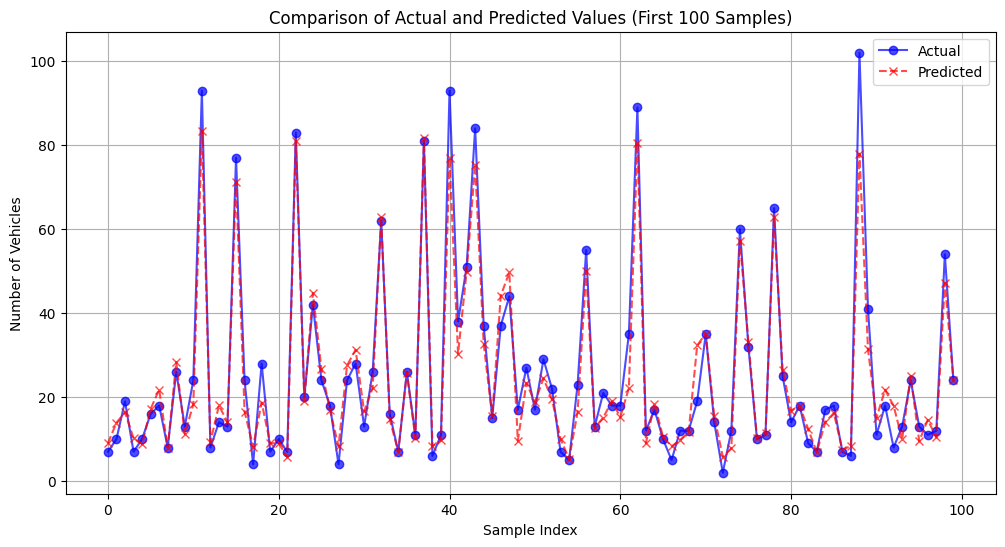

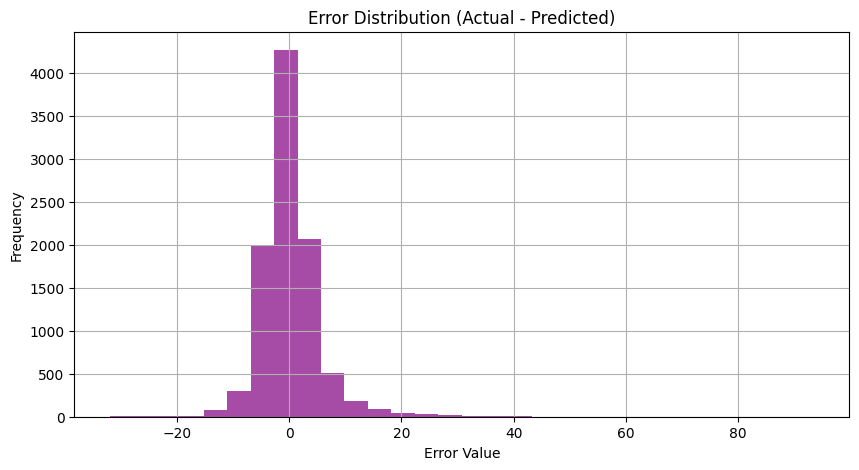

In [250]:
# Biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(12, 6))

# Vẽ giá trị thực tế
plt.plot(y_test_original[:100], label='Actual', color='blue', marker='o', linestyle='-', alpha=0.7)

# Vẽ giá trị dự đoán
plt.plot(y_pred_original[:100], label='Predicted', color='red', marker='x', linestyle='--', alpha=0.7)

plt.title("Comparison of Actual and Predicted Values (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.grid()
plt.show()

# Biểu đồ phân phối lỗi
errors = y_test_original - y_pred_original
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=30, color='purple', alpha=0.7)
plt.title("Error Distribution (Actual - Predicted)")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.grid()

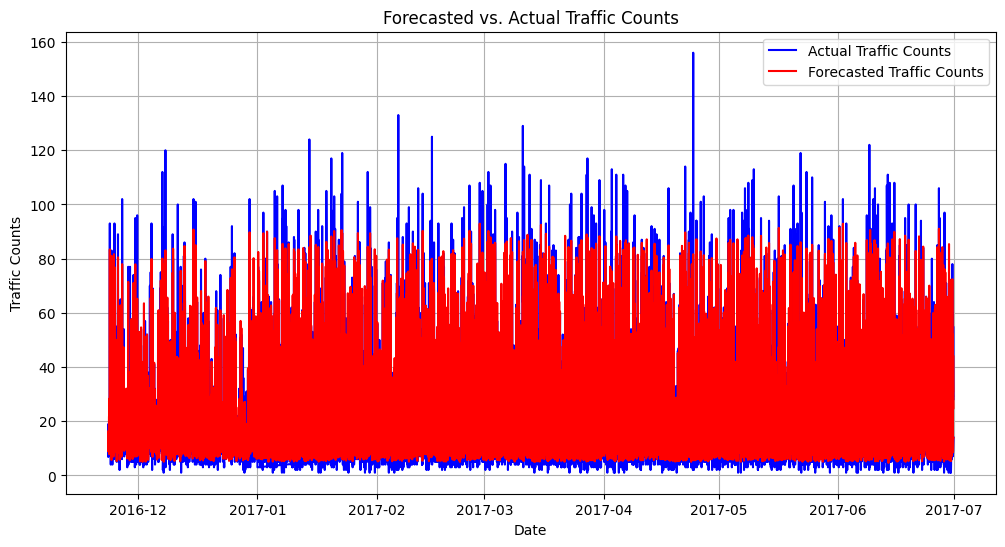

In [251]:
# Getting the timestamp for the test data
test_timestamps = df.iloc[-len(y_test_original):]['DateTime']

# Creating a figure and plot the actual traffic counts
plt.figure(figsize=(12, 6))
plt.plot(test_timestamps, y_test_original, label='Actual Traffic Counts', color='blue')

# Getting the timestamp for the forecasted data
forecasted_timestamps = df.iloc[-len(y_test_original):]['DateTime']

# Plotting the predicted traffic counts for the corresponding time period
plt.plot(forecasted_timestamps, y_pred_original, label='Forecasted Traffic Counts', color='red')

plt.xlabel('Date')
plt.ylabel('Traffic Counts')
plt.title('Forecasted vs. Actual Traffic Counts')
plt.legend()
plt.grid(True)

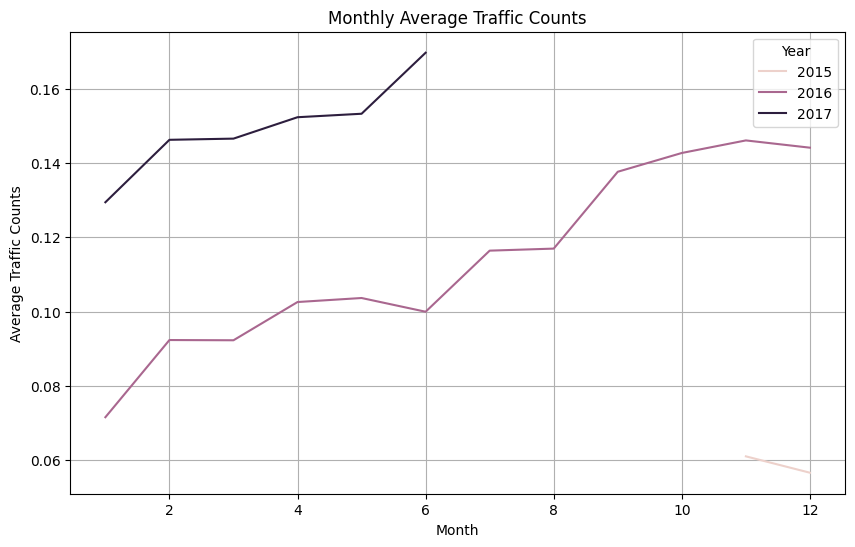

In [252]:
import seaborn as sns
# Extracting Year and Month from the DateTime column
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Grouping the data by Year and Month and calculate the average traffic counts for each month
monthly_traffic = df.groupby(['Year', 'Month'])['Vehicles'].mean().reset_index()

# Plotting the average traffic counts by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Vehicles', hue='Year', data=monthly_traffic)
plt.xlabel('Month')
plt.ylabel('Average Traffic Counts')
plt.title('Monthly Average Traffic Counts')
plt.legend(title='Year', loc='upper right')
plt.grid(True)

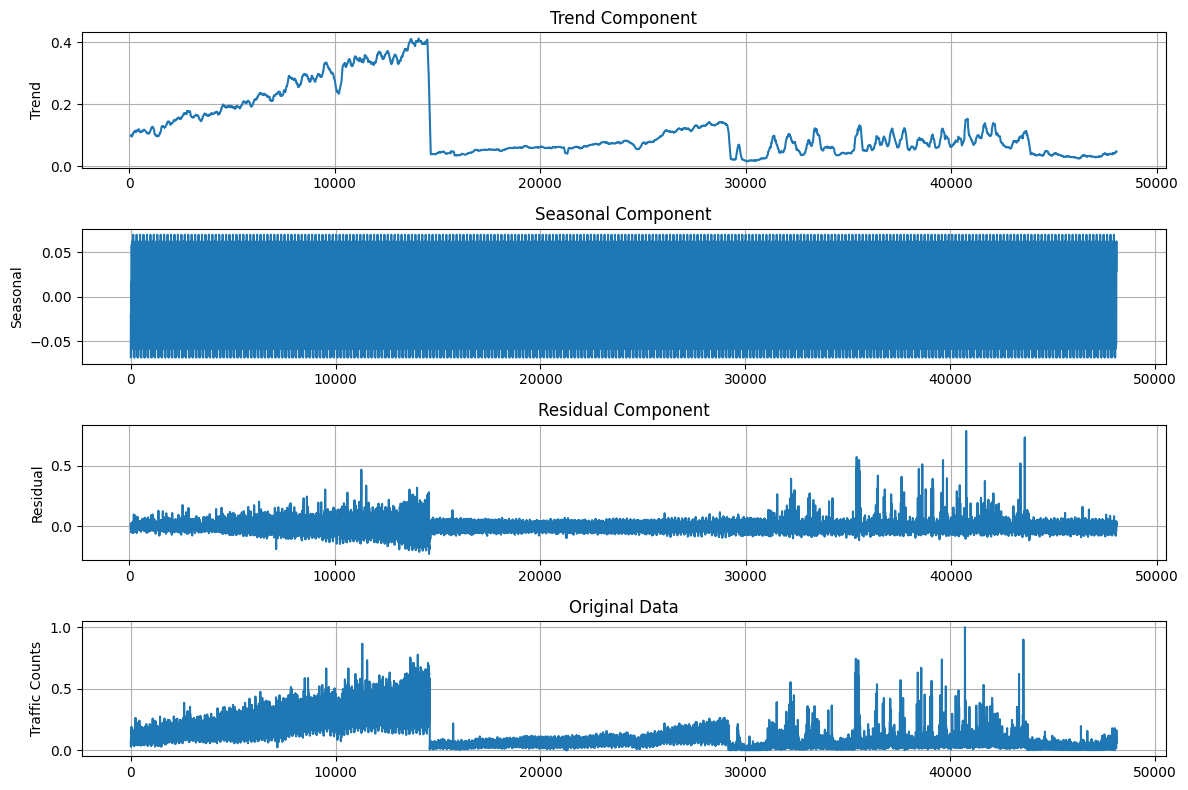

In [253]:
#This plot with the seasonal decomposition will 
#reveal the seasonal variations and recurring patterns in the forecasted data.
import statsmodels.api as sm

# Decomposing the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(df['Vehicles'], model='additive', period=24*7)  # Assuming a weekly seasonality

# Plotting the components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.ylabel('Trend')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.ylabel('Seasonal')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.ylabel('Residual')
plt.title('Residual Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(df['Vehicles'])
plt.ylabel('Traffic Counts')
plt.title('Original Data')
plt.grid(True)

plt.tight_layout()

In [254]:
#Design a Robust Traffic Management System¶
#Designing a dynamic traffic management system that adapts to peak traffic hours and 
#efficiently handles the increased load during those hours.
df['HourOfDay'] = df['DateTime'].dt.hour
df.head()

,Junction,Vehicles,Time,DateOfWeek,Month,Year,IsHoliday,PreviousDay,PreviousHour,Day,Hour,DateTime,HourOfDay
0,1,0.078212,00:00:00,6,11,2015,False,0.0,0.0,1,0,2015-11-01 00:00:00,0
1,1,0.067039,01:00:00,6,11,2015,False,0.0,15.0,1,1,2015-11-01 01:00:00,1
2,1,0.050279,02:00:00,6,11,2015,False,0.0,13.0,1,2,2015-11-01 02:00:00,2
3,1,0.033520,03:00:00,6,11,2015,False,0.0,10.0,1,3,2015-11-01 03:00:00,3
4,1,0.044693,04:00:00,6,11,2015,False,0.0,7.0,1,4,2015-11-01 04:00:00,4


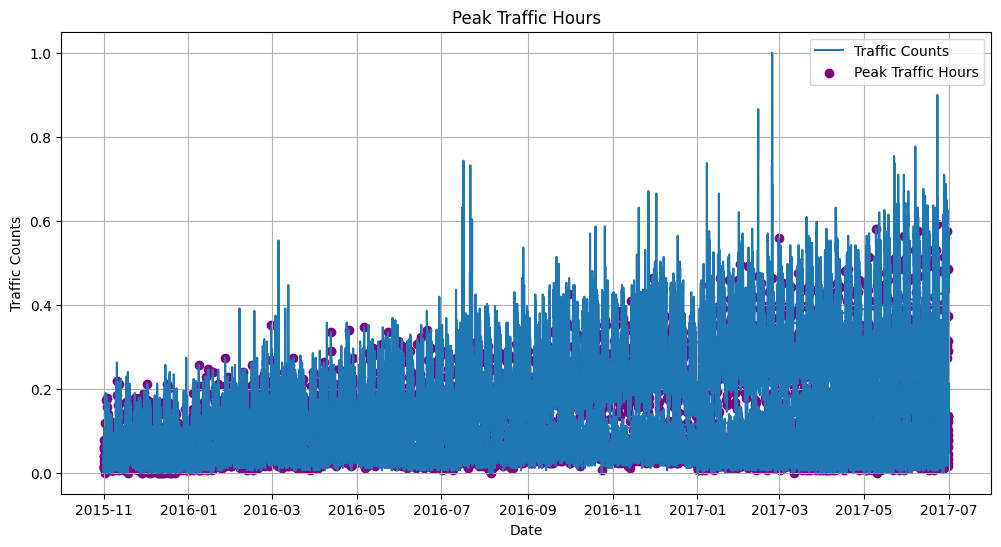

In [255]:
peak_traffic_hours = df[(df['HourOfDay'] >= 7) & (df['HourOfDay'] <= 10)]  # Assumed peak traffic hours from 7 AM to 10 AM

# Visualize peak traffic hours
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Vehicles'], label='Traffic Counts')
plt.scatter(peak_traffic_hours['DateTime'], peak_traffic_hours['Vehicles'], color='purple', label='Peak Traffic Hours')
plt.xlabel('Date')
plt.ylabel('Traffic Counts')
plt.title('Peak Traffic Hours')
plt.legend()
plt.grid(True)

### CNN

In [260]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

C:\Users\Admin\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 4718.7275 - val_loss: 0.2920
Epoch 2/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 6.1994 - val_loss: 0.4539
Epoch 3/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.8720 - val_loss: 0.2997
Epoch 4/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.0029 - val_loss: 0.0117
Epoch 5/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.5046 - val_loss: 0.1183
Epoch 6/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4630 - val_loss: 0.3945
Epoch 7/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.6096 - val_loss: 0.0739
Epoch 8/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.6413 - val_loss: 0.0730
Epoch 9/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.4123 - val_loss: 0.0230
Epoch 10/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2831 - val_loss: 0.0413
Epoch 11/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1233 - val_loss: 0.0743
Epoch 12/30
962/962 ━━━━━━━━━━━━━━━━━━━━ 7s

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0030
Test Loss: 0.002905285684391856
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(0.5, 1.0, 'Comparison of Actual and Predicted Values (CNN Model)')

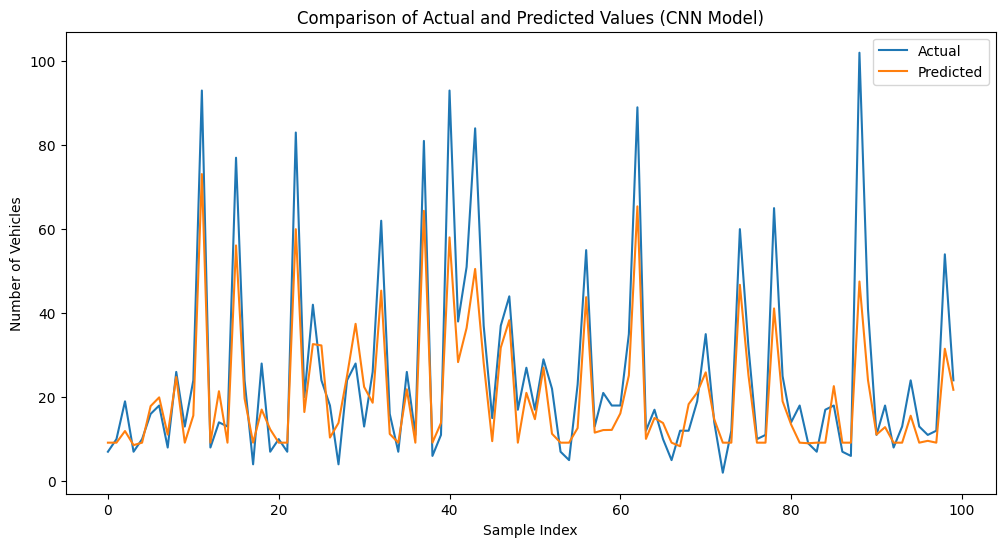

In [265]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

y_pred = model.predict(X_test)

# Chuyển đổi dữ liệu về giá trị gốc nếu đã chuẩn hóa
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(y_test_original[:100], label='Actual')
plt.plot(y_pred_original[:100], label='Predicted')
plt.xlabel("Sample Index")  # Nhãn cho trục X
plt.ylabel("Number of Vehicles")  # Nhãn cho trục Y
plt.legend()
plt.title("Comparison of Actual and Predicted Values (CNN Model)")

In [264]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2

Mean Absolute Error (MAE): 6.362306535944126
Mean Squared Error (MSE): 93.088237035076
Root Mean Squared Error (RMSE): 9.648224553516362


0.7772141556638342

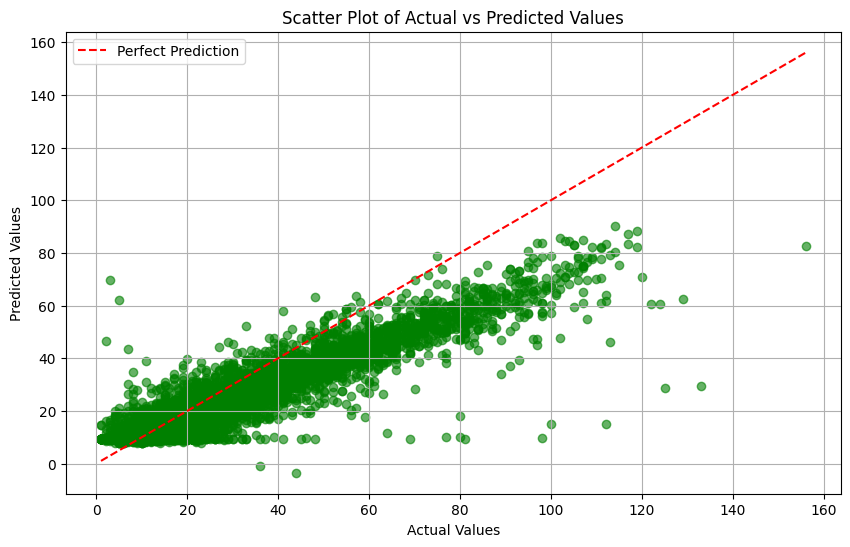

In [263]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='green')
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()